<a href="https://colab.research.google.com/github/Maralmaa1/DIV-tasks/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing

In [16]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.colors

**Problem 1-4
Creating a decision tree Scratch**

In [17]:
class  ScratchDecisionTreeClassifier ():
  def __init__(self, verbose=False):
      self.verbose = verbose


  def fit(self, X, y):
    self.gain = 0
    for feature_index in range(X.shape[1]):
        self.thresholds = np.unique(X[:,feature_index])
        for threshold in self.thresholds:
            _gain = self._calc_ig(X,feature_index,y,threshold)
            if _gain > self.gain:
                self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                self.feature = feature_index
                self.threshold = threshold
                self.gain = _gain
                if self.verbose:
                    print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)    


  def predict(self, X):
    prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
    return prediction


  def _calc_gini(self,y):
    labels,counts = np.unique(y,return_counts=True)
    _gini = 0
    for label in labels:
        _gini += (counts[labels==label]/np.sum(counts))**2
    gini = 1 - _gini
    return gini


  def _calc_ig(self,X,feature_index,y,threshold):
    labels_l = y[X[:,feature_index] < threshold]
    labels_r = y[X[:,feature_index] >= threshold]
    gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
    gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
    gain = self._calc_gini(y) -gain_l -gain_r
    return gain

In [18]:
def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print("mesh shape:{}".format(mesh.shape))
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=matplotlib.colors.ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

**Problem 5 Learning and estimation**

In [19]:
iris_dataset = load_iris()

X = iris_dataset.data[:100,:]
y = iris_dataset.target[:100]

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

clf = ScratchDecisionTreeClassifier(verbose = True)
clf.fit(X_train,y_train)

feature 0 threshold -1.5975414578074663 gain [0.01282051]
feature 0 threshold -1.435765107649749 gain [0.01948052]
feature 0 threshold -1.2739887574920306 gain [0.04054054]
feature 0 threshold -1.1122124073343136 gain [0.04794521]
feature 0 threshold -0.950436057176595 gain [0.07142857]
feature 0 threshold -0.7886597070188778 gain [0.08666667]
feature 0 threshold -0.6268833568611607 gain [0.12695925]
feature 0 threshold -0.4651070067034421 gain [0.20572745]
feature 0 threshold -0.303330656545725 gain [0.23142857]
feature 0 threshold -0.14155430638800642 gain [0.24747475]
feature 0 threshold 0.02022204376971069 gain [0.30050031]
feature 2 threshold -0.8121921245041062 gain [0.38888889]
feature 2 threshold -0.672610234148943 gain [0.47560976]
feature 2 threshold 0.0950901628044546 gain [0.5]


In [20]:
prediction = clf.predict(X_test)

acc = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average='micro')
recall = recall_score(y_test, prediction, average='micro')

print('Scratch Desicion tree: Accuracy', acc, 'Precision ', precision, 'Recall ',recall)

dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(X_train, y_train)

pred = dtc.predict(X_test)
acc = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')

print('Sklearn Desicion tree: Accuracy', acc, 'Precision ', precision, 'Recall ',recall)
     

Scratch Desicion tree: Accuracy 1.0 Precision  1.0 Recall  1.0
Sklearn Desicion tree: Accuracy 1.0 Precision  1.0 Recall  1.0


**Problem 6 Visualization of decision area**

feature 0 threshold -1.6000072725932057 gain [0.01346955]
feature 0 threshold -1.4392025215788138 gain [0.02046672]
feature 0 threshold -1.2783977705644203 gain [0.04259291]
feature 0 threshold -1.117593019550028 gain [0.05037243]
feature 0 threshold -0.9567882685356346 gain [0.08374547]
feature 0 threshold -0.7959835175212424 gain [0.09173878]
feature 0 threshold -0.6351787665068503 gain [0.14614059]
feature 0 threshold -0.47437401549245684 gain [0.21868026]
feature 0 threshold -0.1527645134636712 gain [0.23047395]
feature 0 threshold 0.00804023755072089 gain [0.28095704]
mesh shape:(152680, 2)


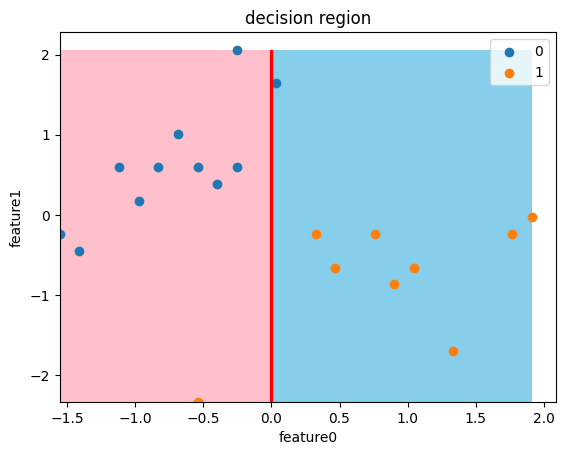

In [21]:
X = iris_dataset.data[:100,:2]
y = iris_dataset.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

clf = ScratchDecisionTreeClassifier(verbose = True)
clf.fit(X_train,y_train)

decision_region(X_test, y_test, clf)